<a href="https://colab.research.google.com/github/nag1045/Time_Series/blob/main/nyc_energy_demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timeStamp  49205 non-null  object 
 1   demand     49124 non-null  float64
 2   precip     48975 non-null  float64
 3   temp       49019 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
df.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [ ]:
df['timeStamp']= pd.to_datetime(df['timeStamp'])

In [ ]:
my_df=df.set_index('timeStamp')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbfeca88d10>,
      dtype=object)

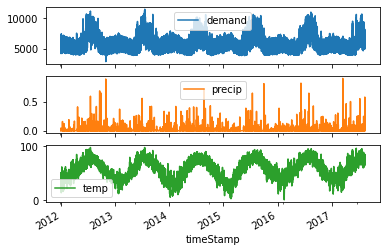

In [ ]:
my_df.plot(subplots=True)

In [ ]:

#this method of null checking is quite efficient
#most of the null and nan values are objects so if your column data type is not object then youcan use this
my_df.query('demand!=demand')

,demand,precip,temp
timeStamp,,,


In [ ]:
df.query('temp!=temp')

,timeStamp,demand,precip,temp


#filling null values using forward fill inside demand and emperature columns

In [ ]:
my_df['demand']=my_df['demand'].fillna(method='ffill')
my_df['temp']=my_df['temp'].fillna(method='ffill')

#Rechecking the both columns

In [ ]:
my_df.demand.isnull().any()

False

In [ ]:
my_df.temp.isnull().any()

False

#Resampling the data monthy because it will be easy to visualize and to handle 

In [ ]:
df_monthly=my_df.resample('M').mean()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbfec7338d0>,
      dtype=object)

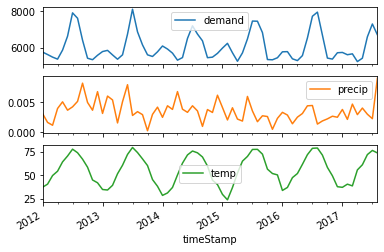

In [ ]:
df_monthly.plot(subplots=True)

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 16.2MB/s 
     |████████████████████████████████| 9.5MB 39.0MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_monthly.shape

(68, 3)

In [ ]:
# Load/split your data
y = df_monthly.demand
train, test = train_test_split(y, train_size=50)

In [ ]:
train.shape,test.shape

((50,), (18,))

In [ ]:
#Not a good model
model = pm.auto_arima( train, start_p=10,max_p = 20, start_q=10,max_q=20, seasonal=True, trace = True, random_state=7)

Performing stepwise search to minimize aic
 ARIMA(10,0,10)(0,0,0)[0] intercept   : AIC=inf, Time=1.37 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=805.585, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=781.851, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=774.266, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1015.495, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=768.467, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=755.205, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=752.916, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=754.795, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=756.777, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=788.729, Time=0.04 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 1.868 seconds


In [ ]:
# Fit your model
model = pm.auto_arima( train, start_p=0 , start_q=0,max_order=4,m=12 , seasonal=True, trace = True, stepwise=True) #seasonal =False


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=544.510, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=543.157, Time=0.24 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=539.216, Time=0.26 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=542.562, Time=0.01 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=539.900, Time=0.05 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=540.394, Time=0.20 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=0.93 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=544.042, Time=0.17 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=541.955, Time=0.22 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=inf, Time=0.52

In [ ]:
forecasts = pd.DataFrame(model.predict(n_periods=18),columns=['Prediction'])

In [ ]:
forecasts.shape




(18, 1)

In [ ]:
forecast=model.predict(test.shape[0],return_conf_int=True)

In [ ]:
forecast

(array([5475.18087059, 5307.10118685, 5687.34033526, 6496.42248642,
        7642.29663816, 7357.84302707, 6612.76664553, 5354.43524456,
        5299.69598451, 5470.55605678, 5789.51126298, 5676.88345055,
        5462.88137038, 5300.53211688, 5619.13911324, 6489.43398762,
        7558.88315347, 7176.97052442]), array([[5044.81235049, 5905.54939069],
        [4844.68810952, 5769.51426417],
        [5214.56038158, 6160.12028895],
        [6023.64252679, 6969.20244605],
        [7169.51667784, 8115.07659849],
        [6885.0630668 , 7830.62298733],
        [6139.9867137 , 7085.54657736],
        [4881.65555382, 5827.2149353 ],
        [4827.15944487, 5772.23252414],
        [4998.71508765, 5942.39702592],
        [5322.58733867, 6256.43518729],
        [5209.96537376, 6143.80152734],
        [4895.37370218, 6030.38903858],
        [4719.04593771, 5882.01829605],
        [5032.99055946, 6205.28766703],
        [5903.2854258 , 7075.58254944],
        [6972.73459072, 8145.03171623],
        [

In [ ]:
forecast_range=pd.date_range(start='2016-03-31',periods=18,freq='M')

In [ ]:
forecast_range

DatetimeIndex(['2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30',
               '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31',
               '2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28',
               '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30',
               '2017-07-31', '2017-08-31'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
forecast_df=pd.DataFrame(forecast[0],index=forecast_range,columns=['Prediction'])

In [ ]:
forecast_df.head()

,Prediction
2016-03-31,5475.180871
2016-04-30,5307.101187
2016-05-31,5687.340335
2016-06-30,6496.422486
2016-07-31,7642.296638


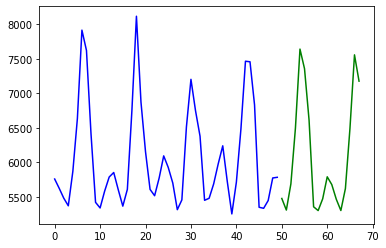

In [ ]:
# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(y.shape[0])
plt.plot(x[:50], train, c='blue')
plt.plot(x[50:], forecast_df, c='green')
plt.show()

#Spliting the train and test 
Alternate way to do it (better)

In [ ]:
df_monthly.index

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
      

In [ ]:
train = df_monthly[(df_monthly.index.get_level_values(0)>='2012-01-31')&(df_monthly.index.get_level_values(0)<='2016-02-29')]
test=df_monthly[df_monthly.index.get_level_values(0)>'2016-02-29'] 

In [ ]:
train.shape

(50, 3)

In [ ]:
test.shape

(18, 3)

In [ ]:
# Fit your model
model = pm.auto_arima( train['demand'], start_p=0 , start_q=0,max_order=4,m=12 , seasonal=True, trace = True, stepwise=True) #seasonal =False



Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=544.510, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=543.157, Time=0.23 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=539.216, Time=0.26 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=542.562, Time=0.01 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=539.900, Time=0.05 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=540.394, Time=0.21 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=544.042, Time=0.17 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=541.955, Time=0.23 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=inf, Time=0.49

In [ ]:
forecasts = model.predict(n_periods=18,return_conf_int=True) 

In [ ]:
forecasts

(array([5475.18087059, 5307.10118685, 5687.34033526, 6496.42248642,
        7642.29663816, 7357.84302707, 6612.76664553, 5354.43524456,
        5299.69598451, 5470.55605678, 5789.51126298, 5676.88345055,
        5462.88137038, 5300.53211688, 5619.13911324, 6489.43398762,
        7558.88315347, 7176.97052442]), array([[5044.81235049, 5905.54939069],
        [4844.68810952, 5769.51426417],
        [5214.56038158, 6160.12028895],
        [6023.64252679, 6969.20244605],
        [7169.51667784, 8115.07659849],
        [6885.0630668 , 7830.62298733],
        [6139.9867137 , 7085.54657736],
        [4881.65555382, 5827.2149353 ],
        [4827.15944487, 5772.23252414],
        [4998.71508765, 5942.39702592],
        [5322.58733867, 6256.43518729],
        [5209.96537376, 6143.80152734],
        [4895.37370218, 6030.38903858],
        [4719.04593771, 5882.01829605],
        [5032.99055946, 6205.28766703],
        [5903.2854258 , 7075.58254944],
        [6972.73459072, 8145.03171623],
        [

In [ ]:
forecasts_df=pd.DataFrame(forecasts[0],index=test.index,columns=['Prediction'])

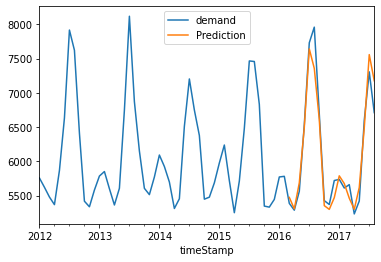

In [ ]:

pd.concat([df_monthly['demand'],forecasts_df],axis=1).plot()